##### Dataset used: Mall Customer (Kaggle)
##### Cluster customers into segments based on income and spending score
##### Perform scaling and visual exploration of groupings
##### Apply K-Means clustering and determine optimal number of clusters
##### Visualize clusters using 2D plots

In [120]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering


### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')


In [121]:
# load dataset
data = pd.read_csv("/workspaces/Elevvo_Internship_Tasks/Data/Mall_Customers.csv")

In [122]:
### Looking at the sample records of the dataset
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [123]:
### Shape of the dataset
data.shape

(200, 5)

In [124]:
### Summary statistics of the numerical columns in the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [125]:
#checking Null values in our dataset
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Data Analysis (EDA)

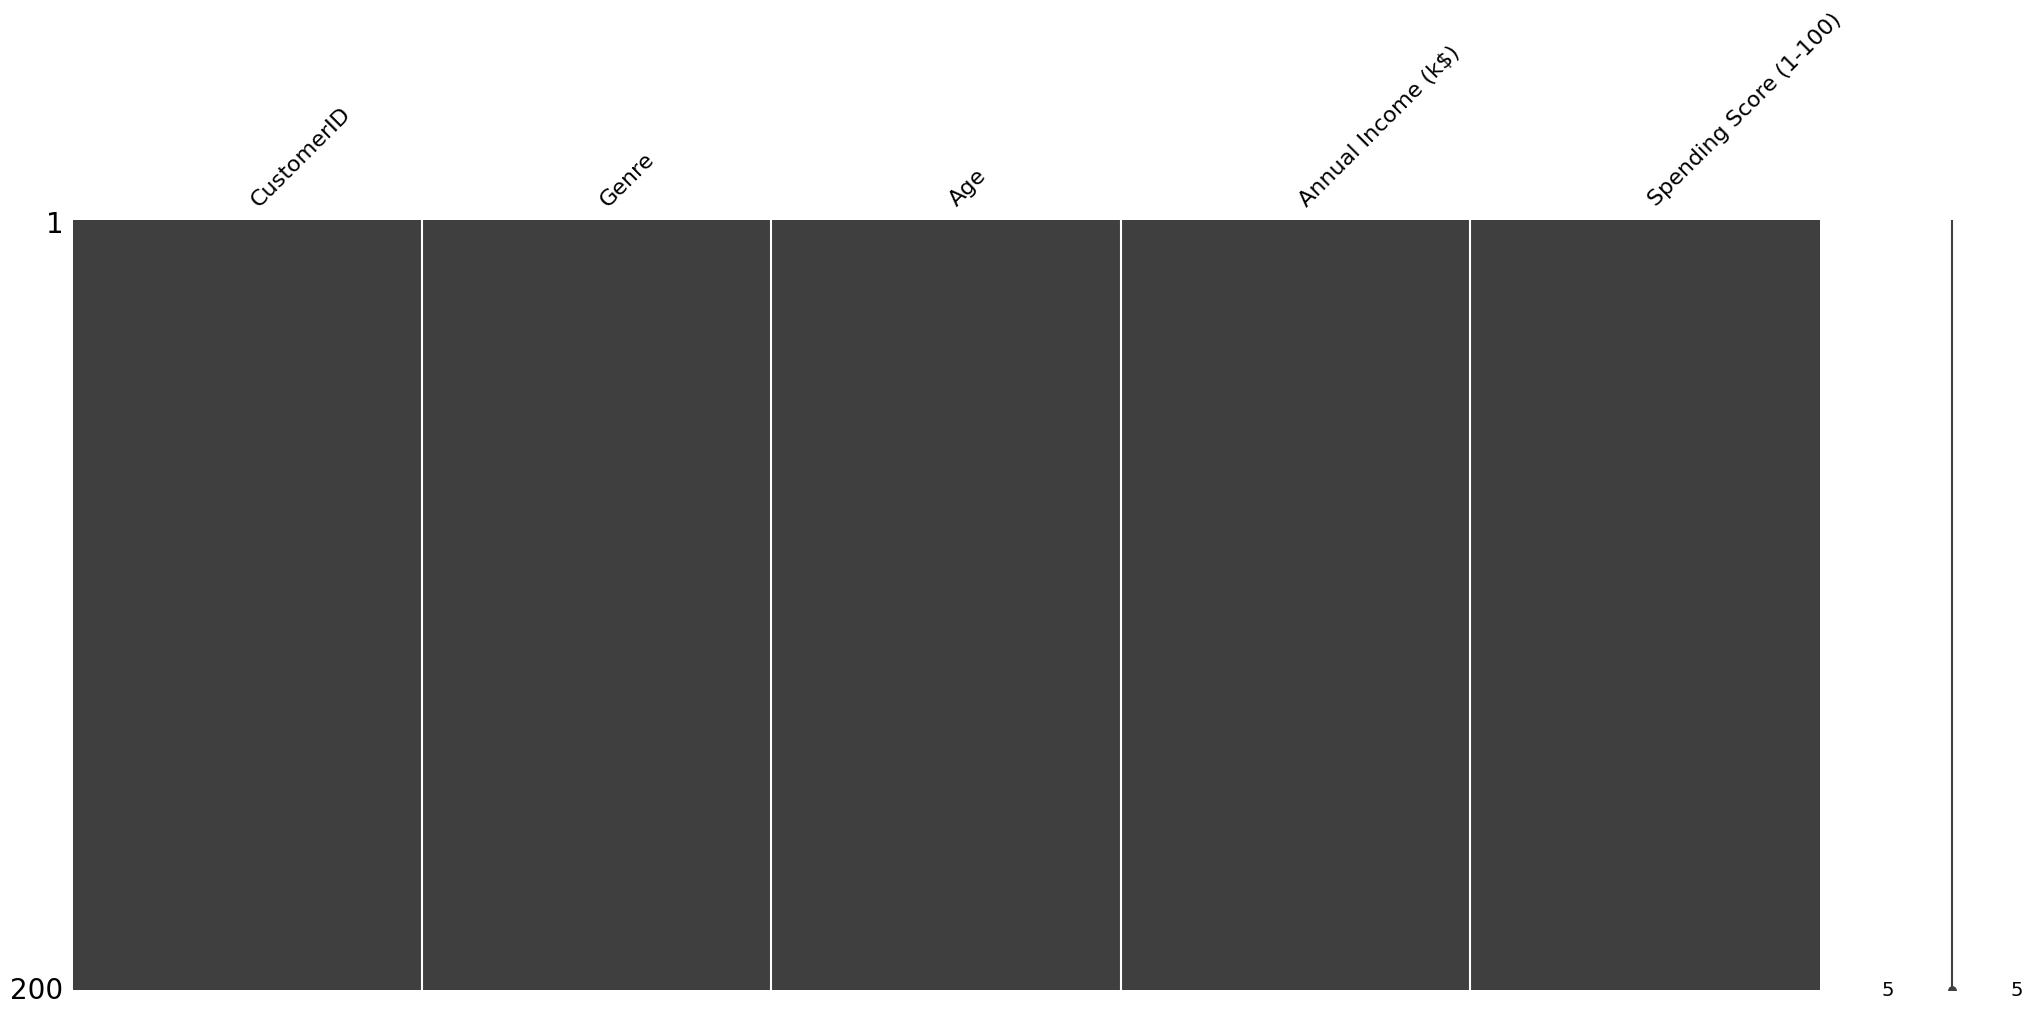

In [126]:
### Visual representation of the missing data in the dataset
missingno.matrix(data);

In [127]:
### Value counts of the column - Gender

gender_count = data['Genre'].value_counts(dropna = False)
gender_count

Genre
Female    112
Male       88
Name: count, dtype: int64

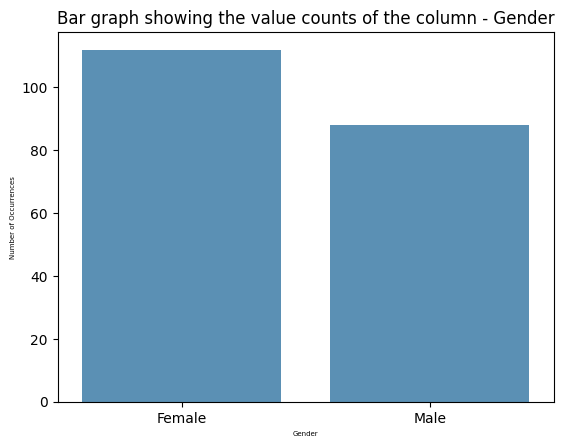

In [128]:
### Bar graph showing the value counts of the column - Gender

sns.barplot(x=gender_count.index, y=gender_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize=5)
plt.xlabel('Gender', fontsize=5)
plt.show()

In [129]:
### Looking at the datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [130]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [133]:
# drop CUST_ID column because it is not used
data.drop(columns=["CustomerID"],axis=1,inplace=True)

In [135]:
###converting categorical text labels ('Male', 'Female') into numeric labels
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

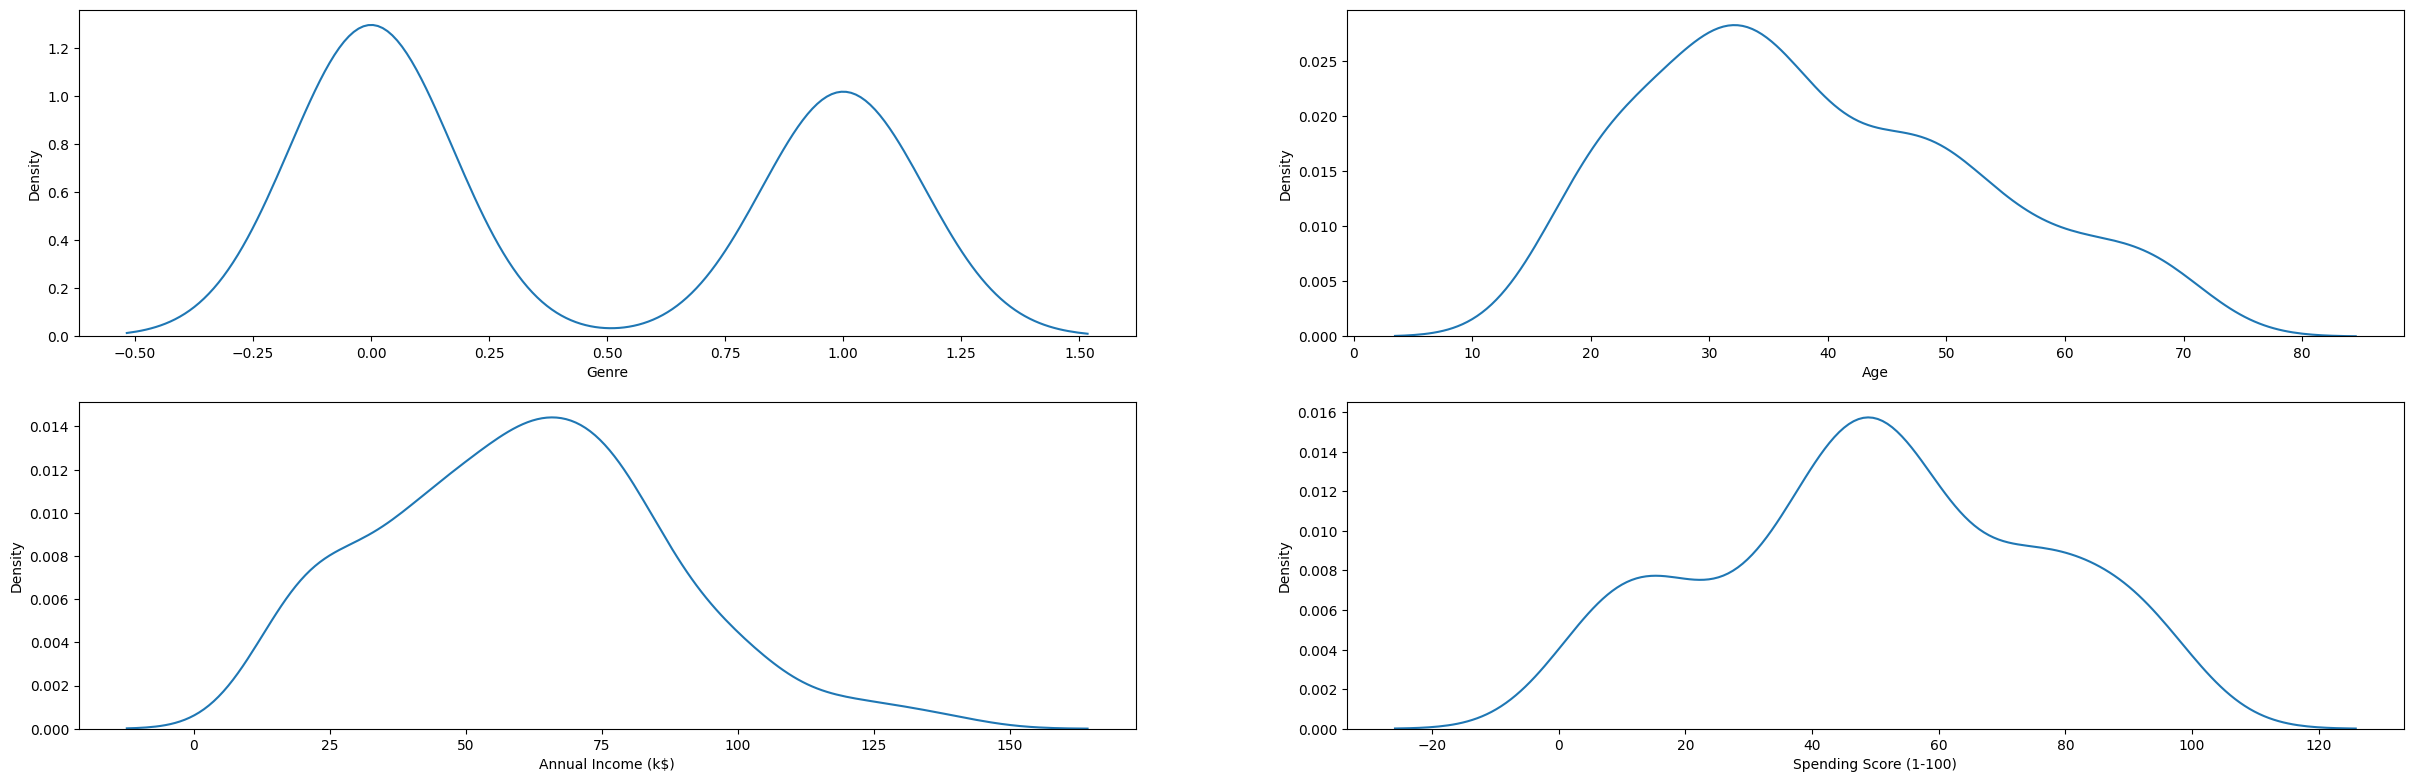

In [136]:
plt.figure(figsize=(30,45))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax = ax)
        plt.xlabel(col)
plt.show()

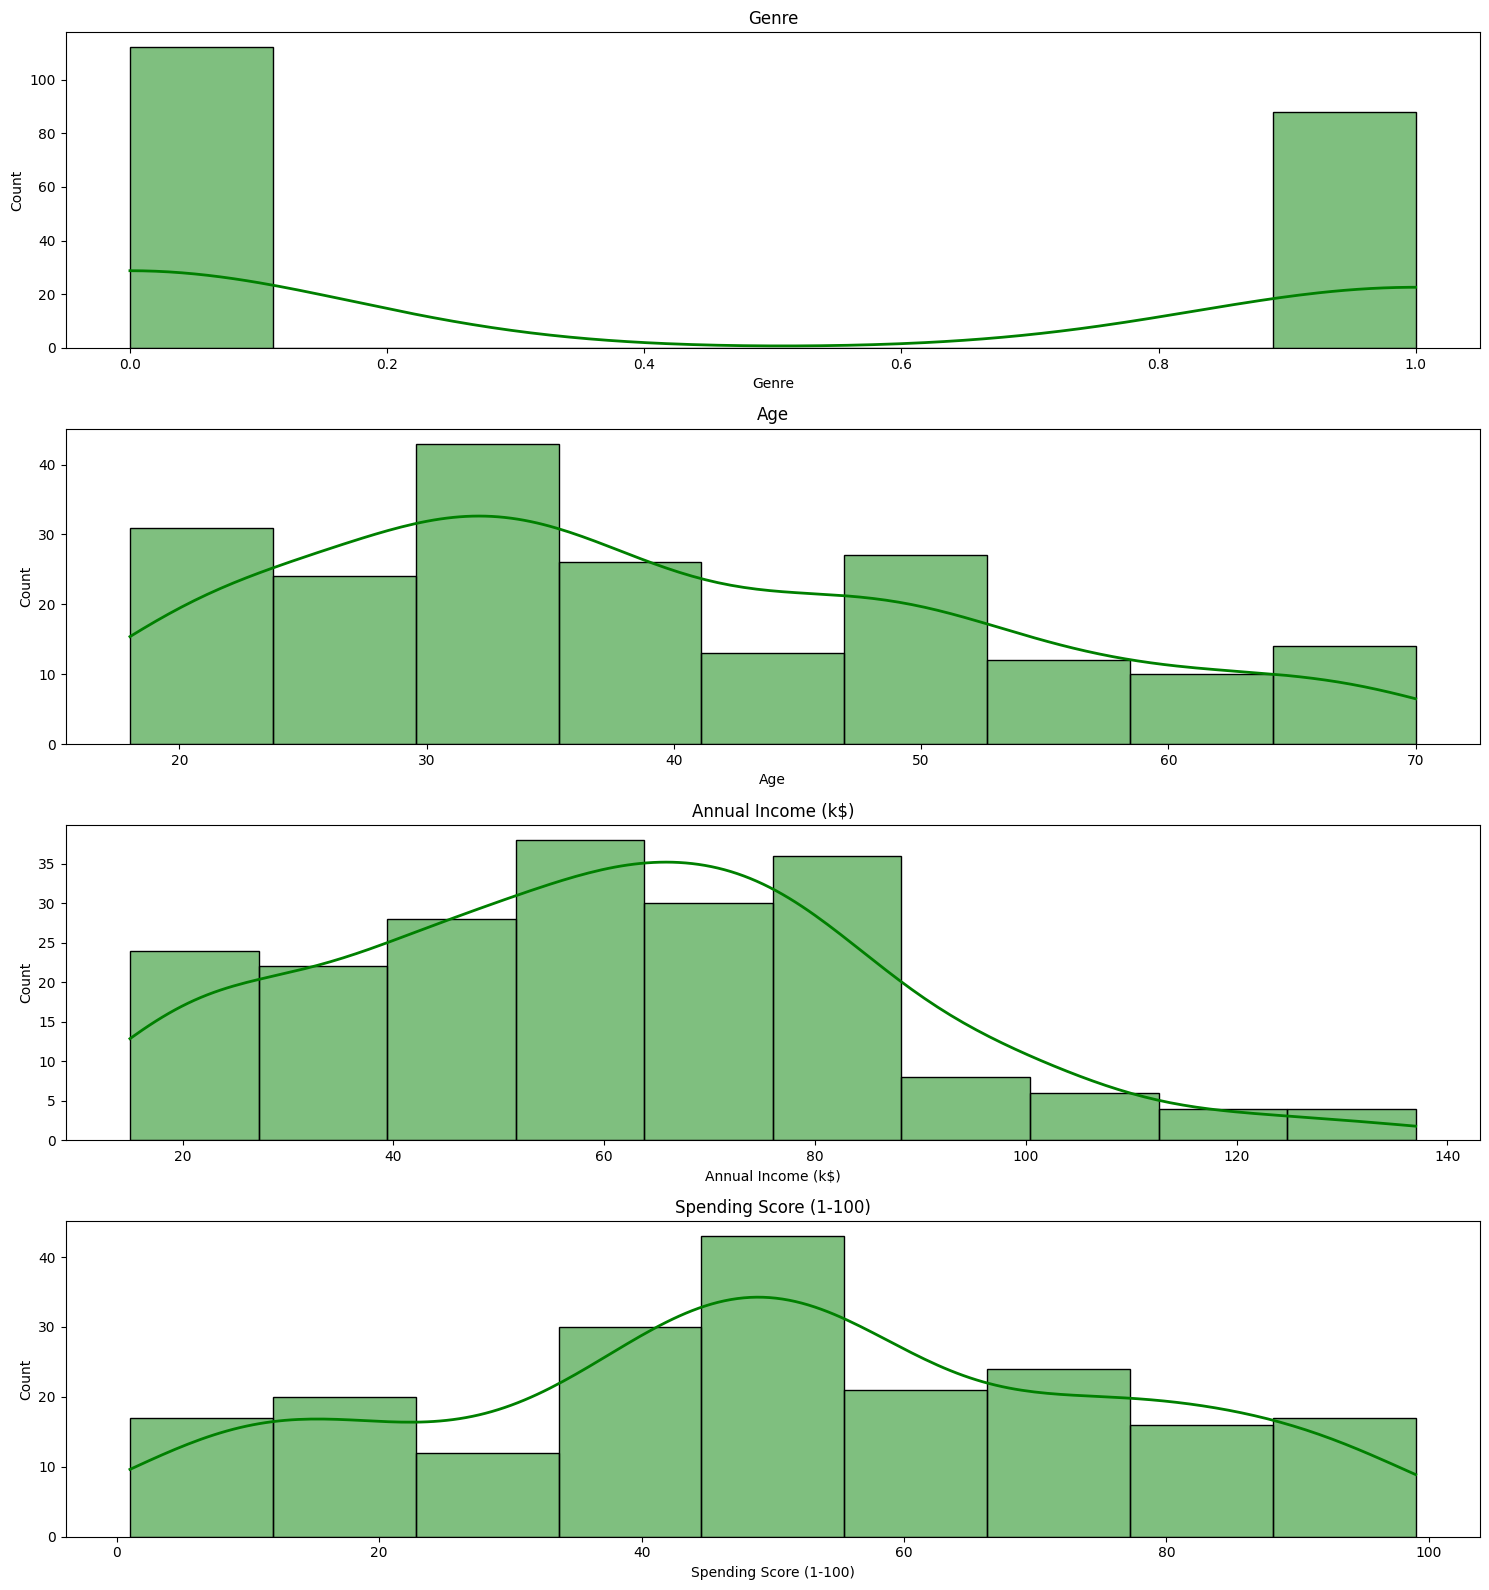

In [137]:
# Select numeric columns (both int and float)
num_cols = data.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(15, len(num_cols) * 4))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i+1)
    sns.histplot(data[col], kde=True, color='g', line_kws={'color':'b','lw':2})
    plt.title(col)
    plt.tight_layout()

plt.show()

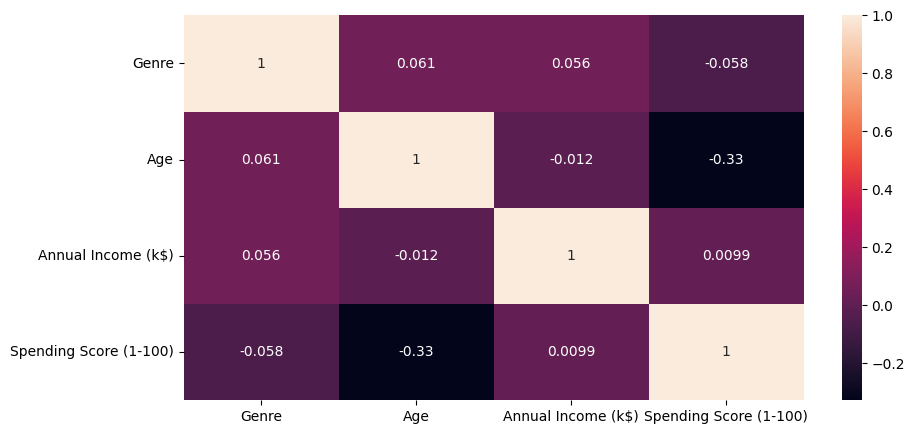

In [138]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Data preprocessing¶

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [140]:
### Filtering the annual income and spending score from the dataset
df = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [141]:
## standardizing numerical features so that they have mean = 0 and standard deviation = 1.
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

In [142]:
##Dimensionality reduction(we want to reduce the data to 2 principal components (so we can visualize it in 2D))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.537109,-0.922207
1,-0.384168,-2.075149
2,-2.416002,0.010665
3,-0.466982,-1.938355
4,-1.455678,-0.895678
...,...,...
195,2.394866,0.813689
196,1.156805,2.375629
197,2.419550,1.112883
198,1.179183,2.947027


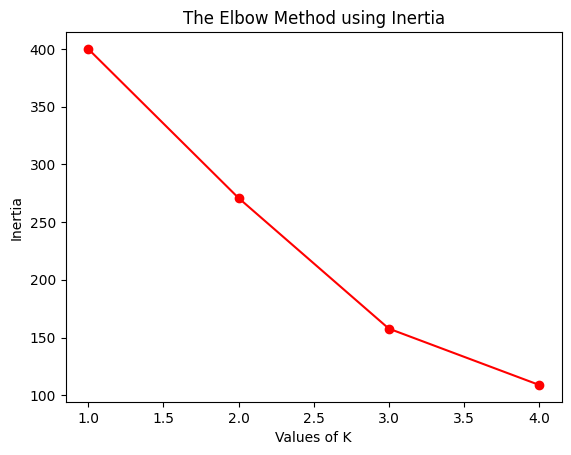

In [144]:
### Implementing the elbow method to find the optimal number of clusters for KMeans.

inertia = []
range_val = range(1,5)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'r-', marker = 'o')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show();

In [ ]:
###Performing KMeans clustering and combining the results with the PCA-transformed data for visualization
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

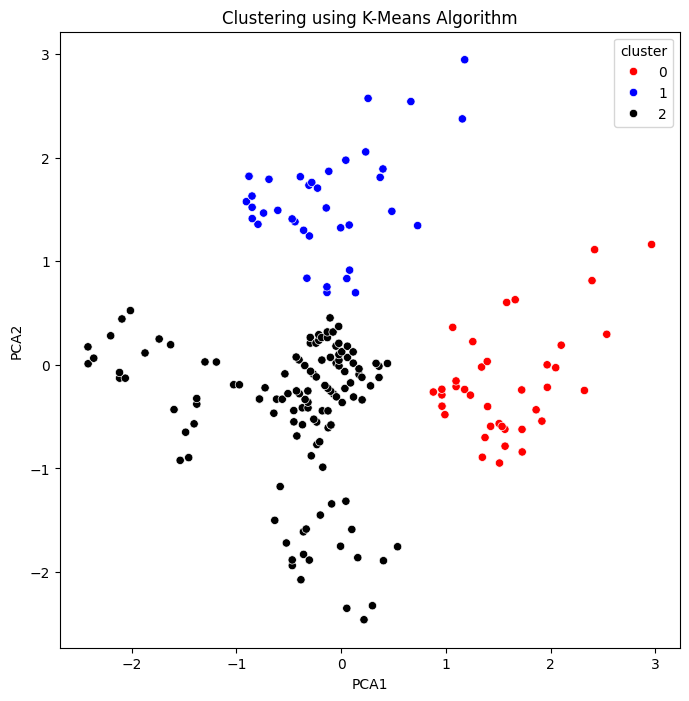

In [145]:
###Visualizing the clusters
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [146]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,Annual Income (k$),Spending Score (1-100)
0,86.538462,82.128205
1,87.000000,18.631579
2,44.154472,49.829268


In [147]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,2
2,16,6,2
3,16,77,2
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,1
197,126,74,0
198,137,18,1


In [148]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,Annual Income (k$),Spending Score (1-100),Cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0


In [98]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,Annual Income (k$),Spending Score (1-100),Cluster
124,70,29,1
126,71,35,1
128,71,11,1
130,71,9,1
132,72,34,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
142,76,40,1


In [99]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==2]
cluster_2_df

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,2
2,16,6,2
3,16,77,2
4,17,40,2
...,...,...,...
118,67,43,2
119,67,57,2
120,67,56,2
121,67,40,2


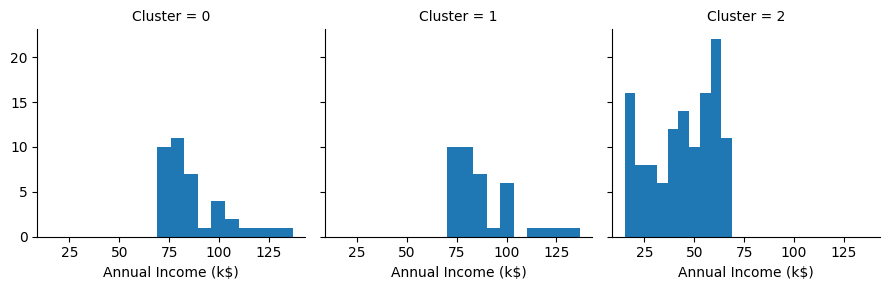

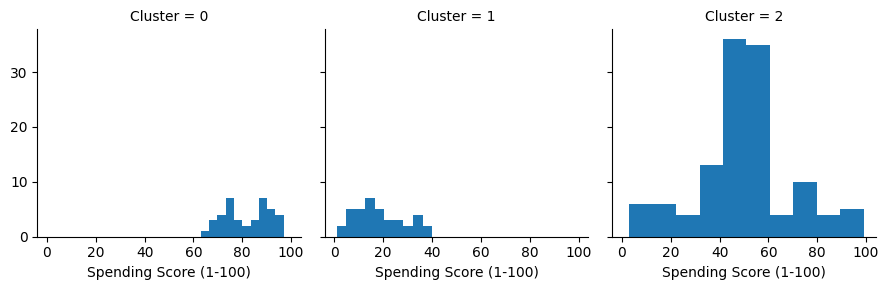

In [100]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

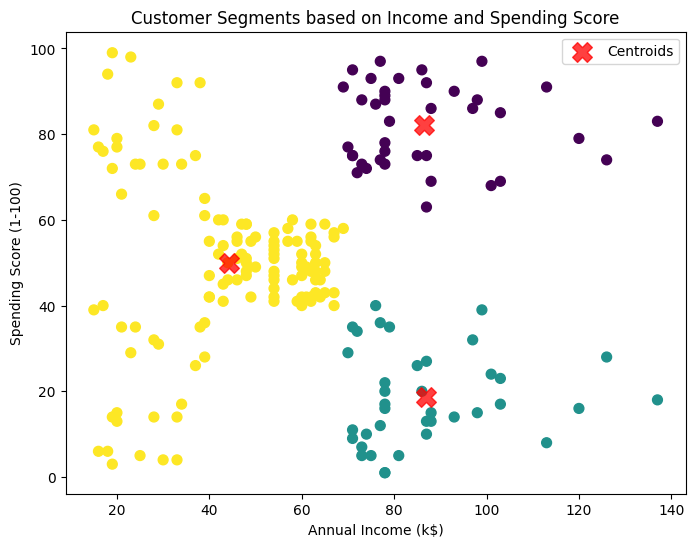

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(
    cluster_df['Annual Income (k$)'], 
    cluster_df['Spending Score (1-100)'], 
    c=cluster_df['Cluster'],  # color by cluster
    cmap='viridis',
    s=50
)

# Plot cluster centers
centers = kmeans_model.cluster_centers_  # in scaled space
centers_unscaled = scalar.inverse_transform(centers)  # bring back to original scale

plt.scatter(
    centers_unscaled[:, 0], 
    centers_unscaled[:, 1], 
    c='red', 
    s=200, 
    alpha=0.75, 
    marker='X', 
    label='Centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Income and Spending Score')
plt.legend()
plt.show()